In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

from sklearn.preprocessing import MinMaxScaler

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list -s "High-fidelity Fraudulent Activity Dataset 2023"

ref                                                          title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zeesolver/credit-card                                        High-fidelity Fraudulent Activity Dataset 2023  143MB  2023-10-05 16:50:57            270         16  1.0              
willianoliveiragibin/high-fidelity-fraudulent-activity-2023  High-fidelity Fraudulent Activity 2023          143MB  2023-10-15 19:16:57              6          1  1.0              


In [7]:
!kaggle datasets download -d zeesolver/credit-card

 96% 138M/143M [00:00<00:00, 147MB/s]
100% 143M/143M [00:01<00:00, 145MB/s]


In [8]:
file_ref = zipfile.ZipFile("/content/credit-card.zip", "r")
file_ref.extractall('/content/sample_data')
file_ref.close()

In [9]:
df = pd.read_csv("/content/sample_data/creditcard_2023.csv" , index_col="id")
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,0.451788,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,0.557015,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,1.258025,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,0.437518,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0


In [10]:
df.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
548663,-0.711774,0.669588,-0.491485,1.092493,-0.788823,-0.089755,-0.922517,0.517278,-1.336570,-0.933863,...,0.493897,0.806309,-0.212788,0.016262,-0.391626,0.685846,0.823974,0.901186,11251.66,1
514533,-0.541542,0.210439,-0.653579,1.264648,2.024505,-1.491720,0.333921,-0.277994,-1.086891,-0.517980,...,-0.135154,0.201871,0.971486,-0.487294,1.835096,1.362777,0.360181,-1.044521,2394.42,1
482252,-0.411106,0.144594,0.003302,0.566730,0.143226,-0.249470,-0.101161,0.116164,-0.560190,-0.242334,...,0.049391,-0.156347,-0.323648,0.126892,0.058215,0.176671,-0.011836,-0.354329,10250.91,1
17567,-1.164202,0.876897,-1.031999,0.142685,-0.819655,-1.059472,-0.228126,1.103762,0.400556,0.359581,...,-0.133449,-0.749239,-0.206843,0.166451,0.179657,-0.900141,-0.217216,-0.764934,2469.79,0
102150,0.086389,-0.126049,1.678559,-0.135335,0.381898,0.631289,0.740483,-0.219128,0.747894,0.909727,...,-0.133740,0.629993,-0.174044,0.288829,-0.891133,-0.739190,0.111393,-0.414376,6173.13,0
507638,-0.563473,-0.003984,-0.821486,0.140589,-0.669032,1.207819,0.264579,0.189771,-0.450294,-0.935747,...,0.210207,0.533558,0.662464,-0.977854,-2.640187,0.280146,1.382269,0.575025,399.01,1
244432,1.375209,-0.672014,0.261161,-0.039819,0.138136,0.632246,0.382489,-0.128439,1.099568,0.632421,...,-0.267197,-1.059269,0.249023,-0.791174,-0.661055,-3.025808,-0.204733,-0.146485,19094.29,0
301701,0.920613,-0.069811,0.005623,0.129631,0.627924,-0.053194,0.533760,-0.146354,0.479758,-0.051721,...,-0.244336,-0.672644,-0.150644,-0.433184,0.986855,-0.774390,-0.123317,0.187428,6543.84,1
144095,-1.539193,2.206041,-1.150614,-0.575255,-0.801579,-1.289801,-0.347471,1.132108,4.723822,6.988893,...,-0.455148,-0.613406,1.168475,-0.133721,2.242440,-1.055811,0.570506,-1.679698,7501.87,0


In [11]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [13]:
df["Class"].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

array([[<Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>,
        <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>],
       [<Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>,
        <Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>],
       [<Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>],
       [<Axes: title={'center': 'V26'}>, <Axes: title={'cen

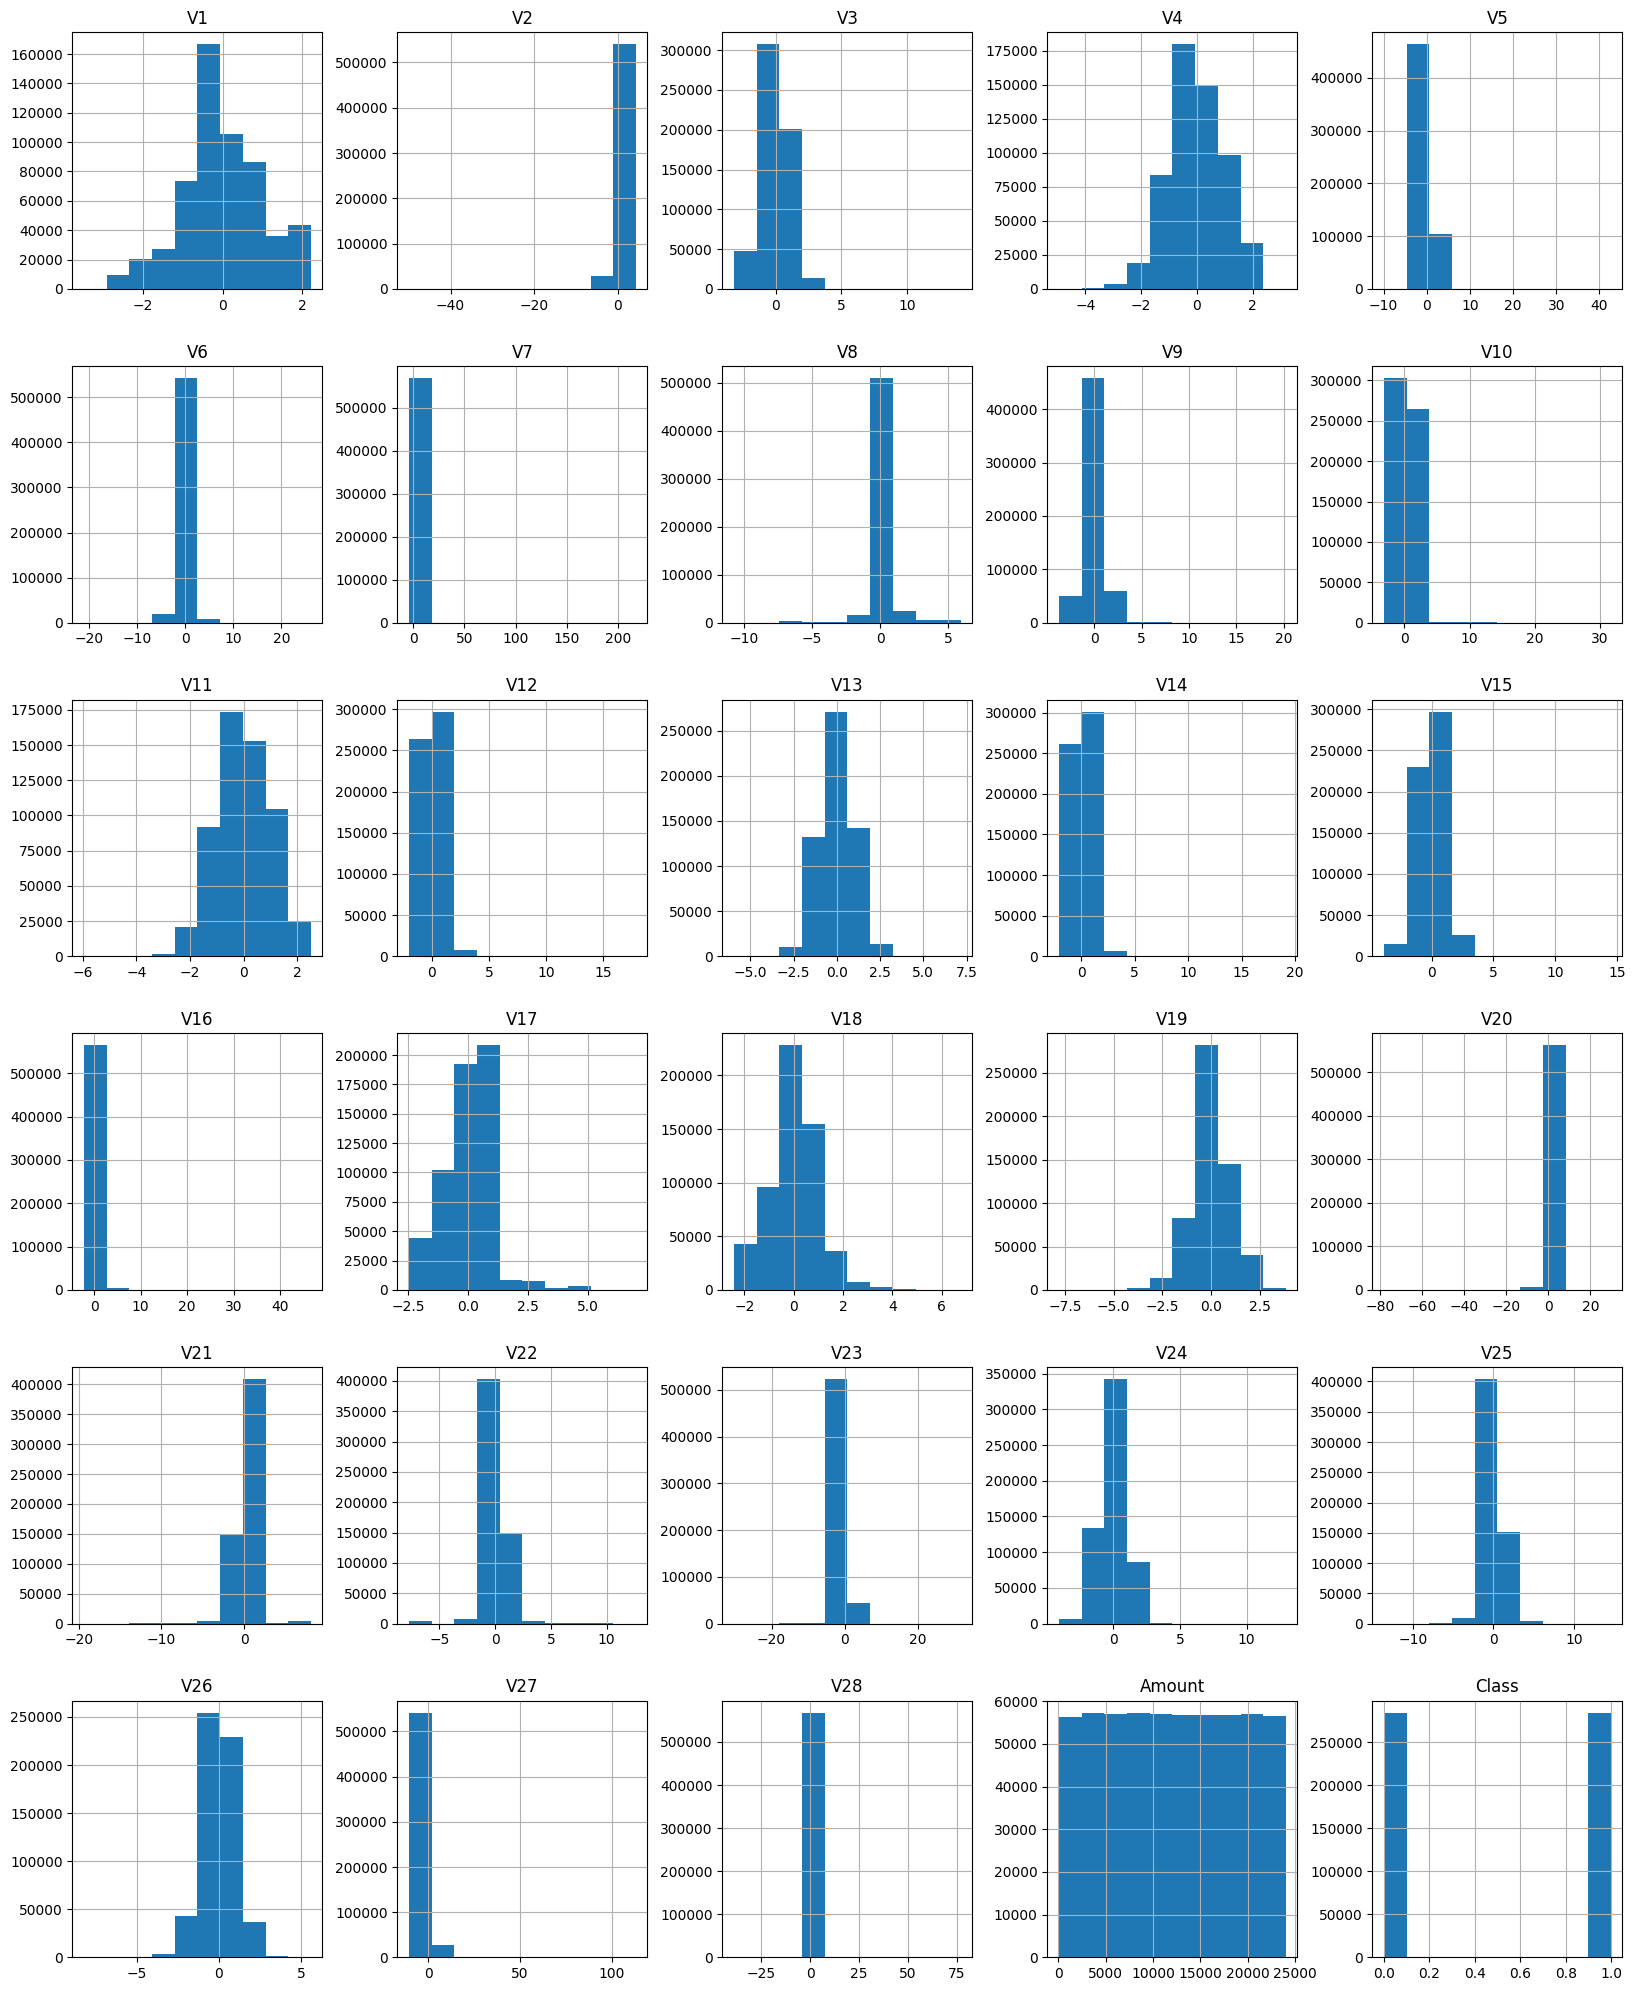

In [14]:
df.hist(figsize=(20,25))

{'whiskers': [<matplotlib.lines.Line2D at 0x7e08c7d69b40>,
 'caps': [<matplotlib.lines.Line2D at 0x7e08c7d6a080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e08c7d698a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e08c7d6a5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e08c7d6a860>],
 'means': []}

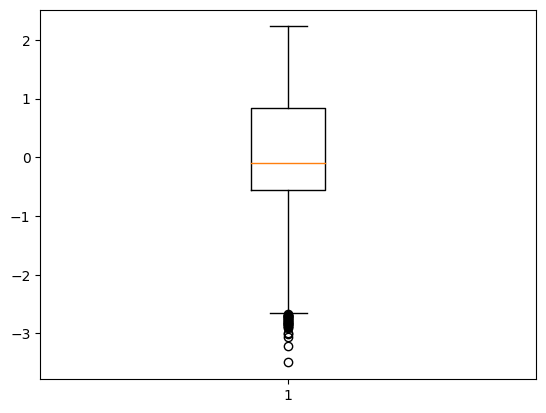

In [15]:
plt.boxplot(df["V1"])